In [1]:
# We want to classify loans into two categories; approved and not approved.
# We will use past loan applications and their respective statuses to train our classifier. 

In [2]:
import os
os.chdir('E:\\PYTHON\\loandefaultcreditriskusecase')
print (os.getcwd())

E:\PYTHON\loandefaultcreditriskusecase


In [4]:
# Load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the data files (Train and Test data are provided separately)
df_train_data = pd.read_csv('Loan_Pred_Train.csv')
df_test_data = pd.read_csv('Loan_Pred_Test.csv')

# Exploratory Analysis

In [6]:
# Check few records of the data to get a hang of it
df_train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
#Checking dimension of data
df_train_data.shape

(614, 13)

In [ ]:
# Now lets visualize each variable separately. 
# Types of variables present here are Categorical, ordinal and numerical.
   # Categorical features: (Gender, Married, Self_Employed, Credit_History, Loan_Status).
   # Ordinal features: (Dependents, Education, Property_Area).
   # Numerical features: (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term).

In [12]:
df_train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#Checking missing values in all the columns - how many null in each column
df_train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
# The new 'f' strings in Python 3.6
name = 'Fred'
age = 42
f'He said his name is {name} and he is {age} years old.'

'He said his name is Fred and he is 42 years old.'

In [15]:
# Ordinal Features: (Dependents, Education, Property_Area).
print(f'Education: {df_train_data.Education.unique()}')
print(f'Dependents: {df_train_data.Dependents.unique()}')
print(f'Property_Area: {df_train_data.Property_Area.unique()}')

Education: ['Graduate' 'Not Graduate']
Dependents: ['0' '1' '2' '3+' nan]
Property_Area: ['Urban' 'Rural' 'Semiurban']


In [16]:
# Categorical Features: (Gender, Married, Self_Employed, Credit_History, Loan_Status)
print(f'Gender: {df_train_data.Gender.unique()}')
print(f'Married: {df_train_data.Married.unique()}')
print(f'Self_Employed: {df_train_data.Self_Employed.unique()}')
print(f'Credit_History: {df_train_data.Credit_History.unique()}')
print(f'Loan_Status: {df_train_data.Loan_Status.unique()}')

Gender: ['Male' 'Female' nan]
Married: ['No' 'Yes' nan]
Self_Employed: ['No' 'Yes' nan]
Credit_History: [ 1.  0. nan]
Loan_Status: ['Y' 'N']


In [17]:
######################
# Univariate Analysis#
######################

Y    422
N    192
Name: Loan_Status, dtype: int64


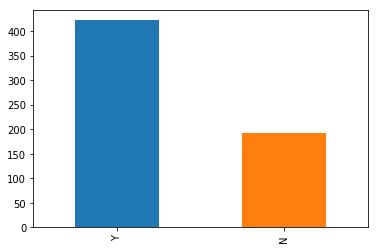

In [18]:
# Loan Status
loan_status_count = df_train_data['Loan_Status'].value_counts()
print(loan_status_count)
loan_status_count.plot.bar()

In [21]:
type(loan_status_count)

pandas.core.series.Series

In [22]:
loan_status_count.values

array([422, 192], dtype=int64)

In [23]:
loan_status_count.index

Index(['Y', 'N'], dtype='object')

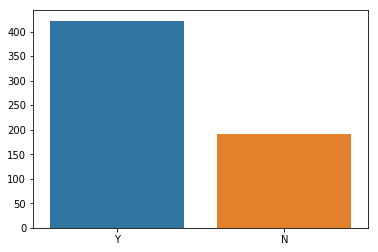

In [24]:
# Alternative way of plotting using Seaborn
sns.barplot(loan_status_count.index, loan_status_count.values)

In [25]:
# Here we see we have less than half of our loans classified as not accepted, 
# we should therefore perform stratefied cv for cross validation (of course later).

Male      489
Female    112
Name: Gender, dtype: int64


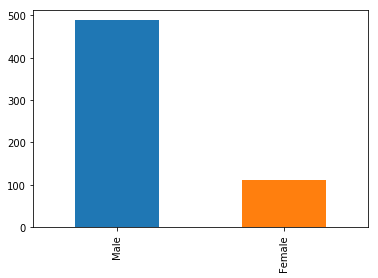

In [26]:
# Gender Status
Gender_status_count = df_train_data['Gender'].value_counts()
print(Gender_status_count)
Gender_status_count.plot.bar()

Yes    398
No     213
Name: Married, dtype: int64


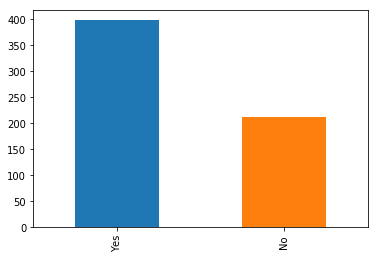

In [27]:
# Married Status
Married_status_count = df_train_data['Married'].value_counts()
print(Married_status_count)
Married_status_count.plot.bar()

No     500
Yes     82
Name: Self_Employed, dtype: int64


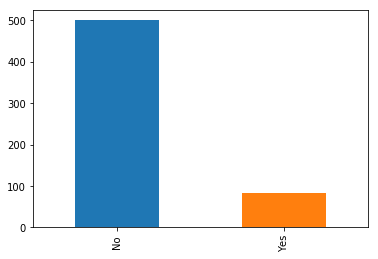

In [28]:
# Self_Employed Status
Self_Employed_status_count = df_train_data['Self_Employed'].value_counts()
print(Self_Employed_status_count)
Self_Employed_status_count.plot.bar()

1.0    475
0.0     89
Name: Credit_History, dtype: int64


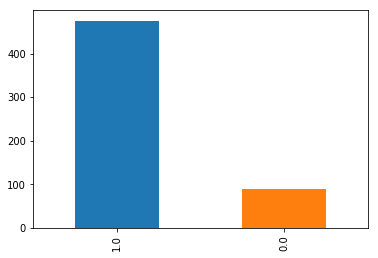

In [29]:
# Credit_History Status
Credit_History_status_count = df_train_data['Credit_History'].value_counts()
print(Credit_History_status_count)
Credit_History_status_count.plot.bar()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


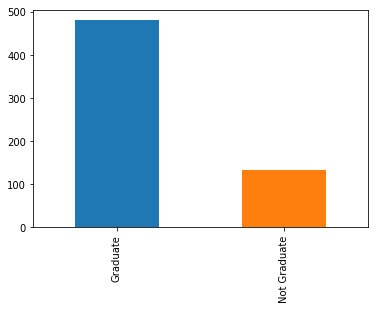

In [30]:
# Education Status
Education_status_count = df_train_data['Education'].value_counts()
print(Education_status_count)
Education_status_count.plot.bar()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


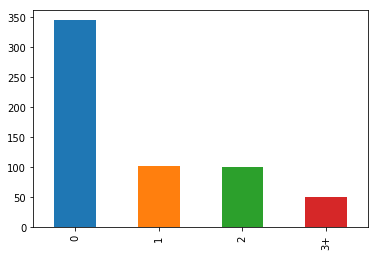

In [31]:
# Dependents Status
Dependents_status_count = df_train_data['Dependents'].value_counts()
print(Dependents_status_count)
Dependents_status_count.plot.bar()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


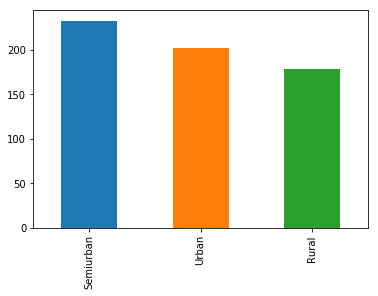

In [32]:
# Property_Area Status
Property_Area_status_count = df_train_data['Property_Area'].value_counts()
print(Property_Area_status_count)
Property_Area_status_count.plot.bar()

C:\Users\bsinghal\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


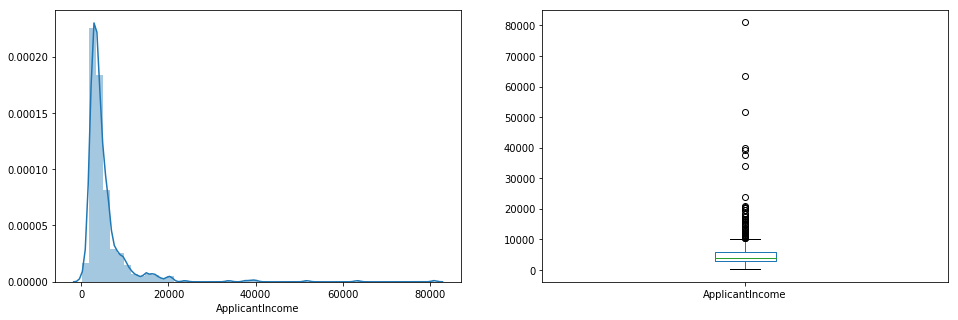

In [33]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_train_data['ApplicantIncome']);

plt.subplot(122)
df_train_data['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

In [34]:
# It can be inferred that most of the data in the distribution of applicant 
# income is towards left which means it is not normally distributed. 
# We will try to make it normal in later sections as algorithms works better 
   # if the data is normally distributed.

# The boxplot confirms the presence of a lot of outliers/extreme values. 
# This can be attributed to the income disparity in the society? (Check!). 
# Part of this can be driven by the fact that we are looking at 
   # people with different education levels. Let us segregate them by Education:

Text(0.5,0.98,'')

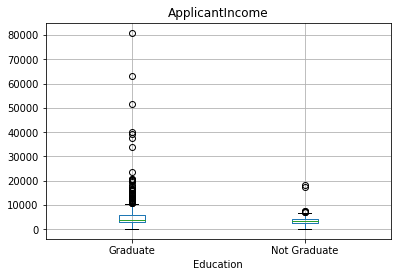

In [36]:
df_train_data.boxplot(column='ApplicantIncome', by='Education')
# To remove the upper title in box plot
plt.suptitle('')

In [37]:
# We can see that there are a higher number of graduates with very high incomes, 
# which are appearing to be the outliers.

In [38]:
# Let’s look at the Coapplicant income distribution.

C:\Users\bsinghal\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


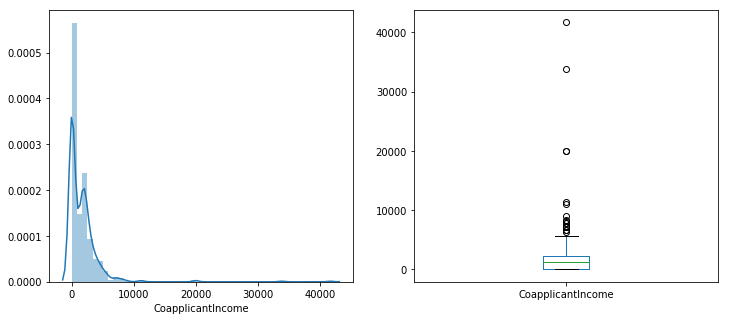

In [39]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_train_data['CoapplicantIncome'])

plt.subplot(122)
df_train_data['CoapplicantIncome'].plot.box(figsize=(12,5))
plt.show()

In [47]:
# We see a similar distribution as that of the applicant income. 
# Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of 
# outliers in the coapplicant income and it is not normally distributed.

Text(0.5,0.98,'')

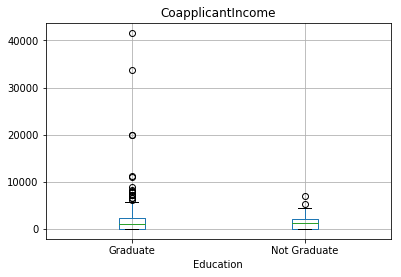

In [46]:
df_train_data.boxplot(column='CoapplicantIncome', by='Education')
plt.suptitle('')

In [41]:
# Let’s look at the distribution of LoanAmount variable.

C:\Users\bsinghal\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


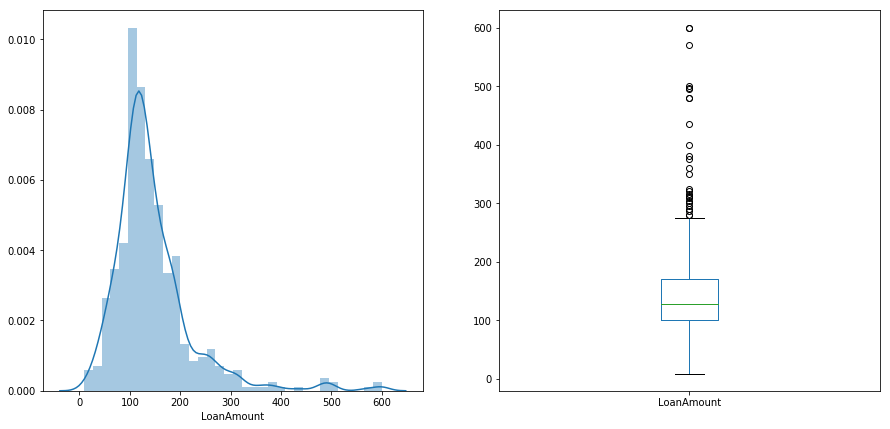

In [42]:
plt.figure(1)
plt.subplot(121)

# distribution plots cannot handle NaN
df = df_train_data.dropna()
sns.distplot(df['LoanAmount'])

plt.subplot(122)
# Figsize = width * length
df['LoanAmount'].plot.box(figsize=(15,7))

In [48]:
######################
# Biivariate Analysis#
######################

In [ ]:
# Categorical Independent Variable vs Target Variable

Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.306748  0.693252


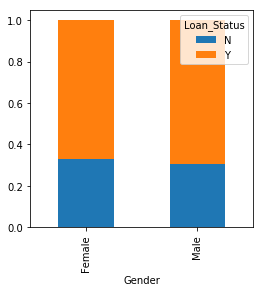

In [49]:
# Compute a simple cross-tabulation of two (or more) factors. 
# By default computes a frequency table of the factors
Gender_Loan = pd.crosstab(df_train_data['Gender'],df_train_data['Loan_Status'])
# print(Gender)

print(Gender_Loan.div(Gender_Loan.sum(axis=1).astype(float), axis=0))
Gender_Loan.div(Gender_Loan.sum(axis=1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

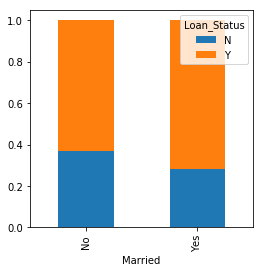

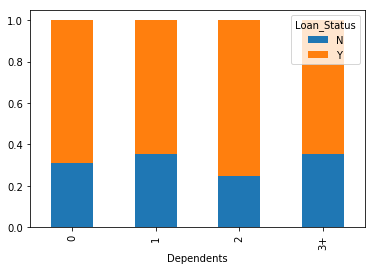

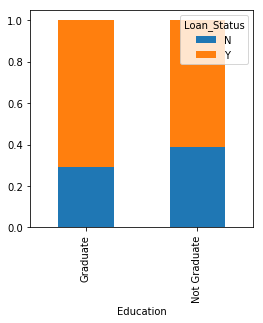

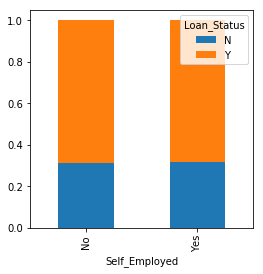

In [66]:
Married_Loan = pd.crosstab(df_train_data['Married'],df_train_data['Loan_Status'])
Dependents_Loan = pd.crosstab(df_train_data['Dependents'],df_train_data['Loan_Status'])
Education_Loan=pd.crosstab(df_train_data['Education'],df_train_data['Loan_Status'])
Self_Employed_Loan = pd.crosstab(df_train_data['Self_Employed'],df_train_data['Loan_Status'])


Married_Loan.div(Married_Loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Dependents_Loan.div(Dependents_Loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

Education_Loan.div(Education_Loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Self_Employed_Loan.div(Self_Employed_Loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

In [62]:
# Observations from above plots:
# Proportion of married applicants is higher for the approved loans.
# Distribution of applicants with 1 or 3+ dependents is similar across 
# both the categories of Loan_Status.
# There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

In [63]:
# Now we will look at the relationship between remaining categorical 
# independent variables and Loan_Status.

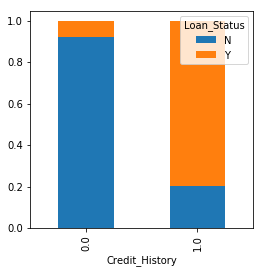

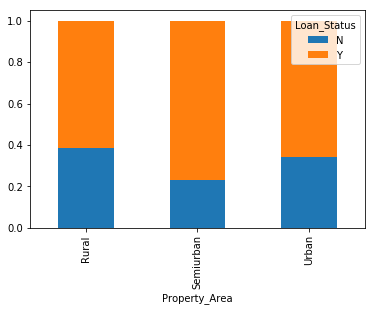

In [64]:
Credit_History_Loan=pd.crosstab(df_train_data['Credit_History'],df_train_data['Loan_Status'])
Property_Area_Loan=pd.crosstab(df_train_data['Property_Area'],df_train_data['Loan_Status'])

Credit_History_Loan.div(Credit_History_Loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area_Loan.div(Property_Area_Loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

In [ ]:
# Notice that "Credit History" has a strong impact on Loan Status
# Credit History of 1 accounts for more loan approvals
# Similarly, if 'property Area' is semiurban, there are more loan approvals

In [77]:
# Numerical Independent Variable vs Target Variable

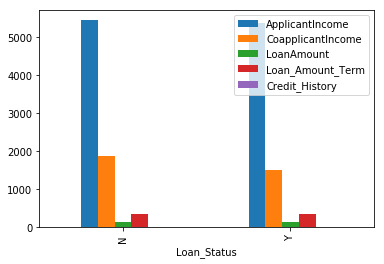

In [79]:
df_train_data.groupby('Loan_Status').mean().plot.bar()

In [80]:
# Notice that the numeric features do not have great impact on Outcome variable
# Aplicant's income is same for both 'Y' and 'N' categories of loan status
# Same applies for "coapplicant's income" and other numeric features

# Handling Missing Values

In [ ]:
# Below we have imputed categorical features with the mode, 
# and numerical features with the median of the data. 
# An alternative would be to try to use other features to 
# predict the missing feature values, 

In [5]:
#report number of missing values for each feature
for col in df_train_data.columns:
    missing_series = df_train_data[col][df_train_data[col].isna() == True]
    if missing_series.size > 0:
        print(col, missing_series.size)

Gender 13
Married 3
Dependents 15
Self_Employed 32
LoanAmount 22
Loan_Amount_Term 14
Credit_History 50


In [6]:
#fill missing categorical values with mode

categ_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 
              'Credit_History']
for col in categ_cols:
    df_train_data[col] = df_train_data[col].fillna(df_train_data[col].mode()[0])
    df_test_data[col] = df_test_data[col].fillna(df_test_data[col].mode()[0])

In [7]:
df_train_data["Gender"].mode()

0    Male
dtype: object

In [8]:
df_train_data["Gender"].mode()[0]

'Male'

In [9]:
#create dummy variables for categorical features
dummy_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
              'Credit_History', 'Property_Area']
train_dummies = pd.get_dummies(df_train_data[dummy_cols], drop_first = True)
test_dummies = pd.get_dummies(df_test_data[dummy_cols], drop_first = True) 

In [10]:
train_dummies.head()

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,0,0,0,0,0,0,0,1
1,1.0,1,1,1,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,1,0,1
3,1.0,1,1,0,0,0,1,0,0,1
4,1.0,1,0,0,0,0,0,0,0,1


In [11]:
# Numeric feature Extraction 
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# If no normalization needed:
#df_train_num = df_train_data[num_cols]
#df_test_num = df_test_data[num_cols]

# If Normalization is needed, use the following else ignore

# Naive Bayes, Linear Discriminant Analysis, and Tree-Based models are 
# not affected by feature scaling, unlike for KNN, K-Means, SVM, PCA

df_train_num = (df_train_data[num_cols] - df_train_data[num_cols].mean()) / df_train_data[num_cols].std()
df_test_num = (df_test_data[num_cols] - df_train_data[num_cols].mean()) / df_train_data[num_cols].std()

In [12]:
#set loan status to 1 if approved, else 0 
loan_status = df_train_data.Loan_Status.apply(lambda x: 0 if x == 'N' else 1)

In [ ]:
# Alternatively, you could do below:
# df_train_data['Loan_Status'].replace('N', 0,inplace=True)
# df_train_data['Loan_Status'].replace('Y', 1,inplace=True)

In [13]:
# Recreate your final train set and test set data
df_train = pd.concat([df_train_num, train_dummies, loan_status], axis =1)
df_test = pd.concat([df_test_num, test_dummies], axis =1)

In [14]:
#create dataframes with numerical missing values with median imputed 
df_train_fill_median = df_train.fillna(df_train.median())
df_test_fill_median = df_test.fillna(df_test.median())
df_train_fill_median.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0.072931,-0.554036,-0.215127,0.273009,1.0,1,0,0,0,0,0,0,0,1,1
1,-0.134302,-0.038700,-0.215127,0.273009,1.0,1,1,1,0,0,0,0,0,0,0
2,-0.393427,-0.554036,-0.939534,0.273009,1.0,1,1,0,0,0,0,1,0,1,1
3,-0.461686,0.251774,-0.308599,0.273009,1.0,1,1,0,0,0,1,0,0,1,1
4,0.097649,-0.554036,-0.063236,0.273009,1.0,1,0,0,0,0,0,0,0,1,1


In [15]:
df_train_fill_median.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status                0
dtype: int64

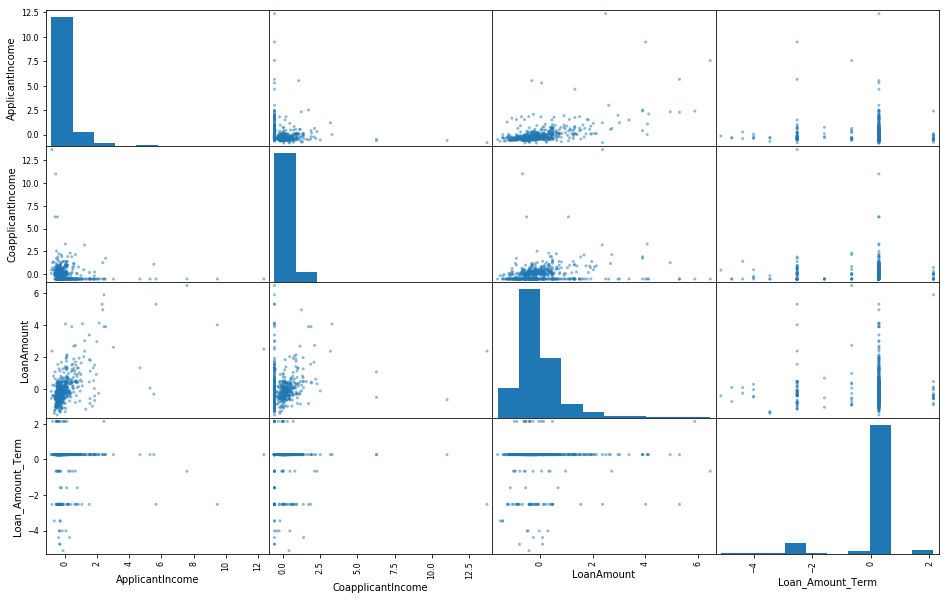

In [126]:
pd.plotting.scatter_matrix(df_train_num, figsize = (16, 10))
plt.show()

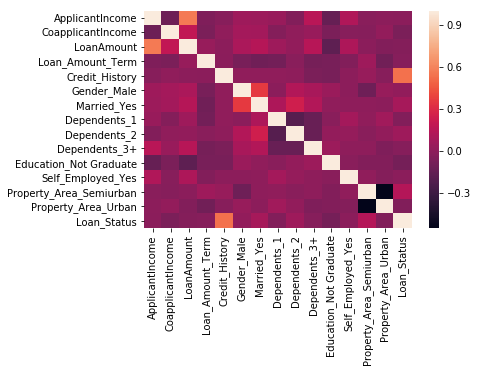

In [127]:
corr = df_train_fill_median.corr()
sns.heatmap(corr)

In [128]:
# Here we see that ApplicantIncome and LoanAmount have significant colinearity. 
# Also credit history seems to be highly correlated with loan status, 
  # this points to it being the most important feature for our model.

# Model Parameter Tuning and Selection

In [129]:
# Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
columns = df_train_fill_median.drop('Loan_Status',axis =1).columns
X_train, X_test, y_train, y_test = train_test_split(df_train_fill_median[columns], df_train_fill_median.Loan_Status, test_size = .2)

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [19]:
models=[]
models.append(("logreg",LogisticRegression(solver='liblinear')))
models.append(("tree",DecisionTreeClassifier()))
models.append(("forest",RandomForestClassifier(n_estimators=20)))
models.append(("lda",LinearDiscriminantAnalysis()))
models.append(("svc",SVC()))
models.append(("knn",KNeighborsClassifier()))
models.append(("nb",GaussianNB()))

In [146]:
models

[('logreg',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('tree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
                         random_state=None, splitter='best')),
 ('forest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_impurity_decrea

In [20]:
seed=7
scoring='accuracy'
# Scoring can be 'precision' or 'recall' as well

In [21]:

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [28]:
for name,model in models:
    kfold=KFold(n_splits=5,random_state=seed)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("%s %f %f" % (name,cv_result.mean(),cv_result.std()))

logreg 0.806370 0.040742
tree 0.686333 0.030049
forest 0.741167 0.043796
lda 0.806370 0.040742
svc 0.806370 0.040742
knn 0.724923 0.038878
nb 0.788044 0.039976


C:\Users\bikra\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bikra\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bikra\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bikra\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

In [150]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
final_model=LogisticRegression(solver='liblinear')
final_model.fit(X_train,y_train)
pred=final_model.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7804878048780488
[[11 25]
 [ 2 85]]
              precision    recall  f1-score   support

           0       0.85      0.31      0.45        36
           1       0.77      0.98      0.86        87

    accuracy                           0.78       123
   macro avg       0.81      0.64      0.66       123
weighted avg       0.79      0.78      0.74       123



In [151]:
final_pred = final_model.predict(df_test_fill_median)

In [152]:
final_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#report number of missing values for each feature 
for col in df_train_data.columns:     
    missing_series = df_train_data[col][df_train_data[col].isna() == True]     
    if missing_series.size > 0:         
        print(col, missing_series.size)

In [ ]:
#fill missing categorical values with mode

categ_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 
              'Credit_History']
for col in categ_cols:
    df_train_data[col] = df_train_data[col].fillna(df_train_data[col].mode()[0])
    df_test_data[col] = df_test_data[col].fillna(df_test_data[col].mode()[0])